In [ ]:
from pytriqs.gf.local import *
from pytriqs.utility import mpi
from pytriqs.plot.mpl_interface import *
from ctint_keldysh import *
import numpy as np
%matplotlib inline

# Profumo paper parameters

In [ ]:
alpha = 0.5
gamma = 0.5
epsilon_d = 0.
beta = 200.
U_qmc = 2.
n_cycles = 2000000
n_warmup_cycles = 100
length_cycle = 1
random_seed = 15258
lmax_order = 3
p_dbl = 0
Nt_gf0 = 25000
tmax_gf0 = 200.0
tmax = 20.
muL = 0.
muR = 0.

#if_ph = False
#if_adjust_U = True
#is_current = False

g0_lesser, g0_greater = make_g0_semi_circular(beta=beta, Gamma=gamma,
                                              tmax_gf0=tmax_gf0, Nt_gf0=Nt_gf0,
                                              epsilon_d=epsilon_d,
                                              muL=muL, muR=muR)

# Solve

In [ ]:
qn_list, cn_list, qn_last = [], [], []

S = SolverCore(g0_lesser, g0_greater)

for order in range(0, last_order):

    pn, sn = S.solve(U=U_qmc,
                     max_perturbation_order=order,
                     min_perturbation_order=0,
                     p_dbl=p_dbl,
                     tmax=tmax,
                     alpha=alpha,
                     verbosity=0,
                     n_cycles=n_cycles, 
                     n_warmup_cycles=n_warmup_cycles, 
                     length_cycle=length_cycle)

# Compare G0 to KWANT

In [1]:
U = 0.2
beta = 100.0
tmax = 10.0
gamma = 0.25 # = Gamma
alpha = 0.0
#Edp = 0
epsilon_d = 0.
Nt_gf0 = 25000
tmax_gf0 = 100.
muL = 0.0
muR = 0.0

g0_lesser, g0_greater = make_g0_semi_circular(beta=beta, Gamma=gamma,
                                              tmax_gf0=tmax_gf0, Nt_gf0=Nt_gf0,
                                              epsilon_d=epsilon_d,
                                              muL=muL, muR=muR)

Starting on 1 Nodes at : 2016-02-15 13:50:21.083638


(-10, 10)

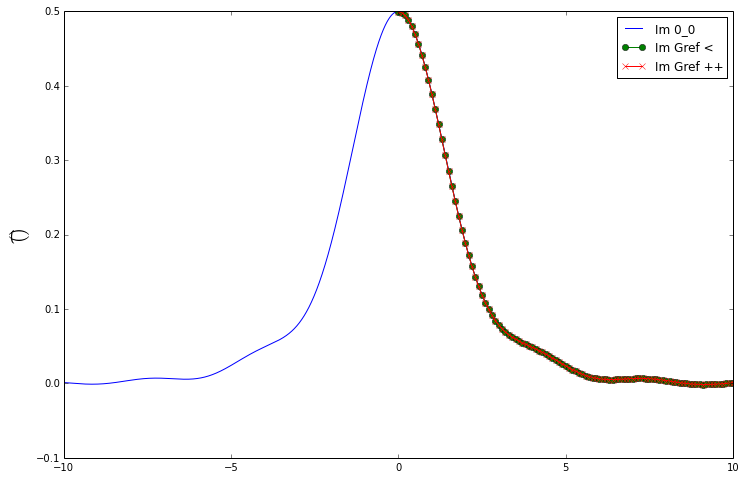

In [10]:
oplot(g0_lesser[0,0].imag)
g = np.loadtxt('g0/g0.dat')
plt.plot(g[:,0], g[:,2], '-o', label = 'Im Gref <')
plt.plot(g[:,0], -(g[:,2] + g[:,4]), '-x', label = 'Im Gref ++')
plt.legend()
plt.xlim(-10,10)

(-10, 10)

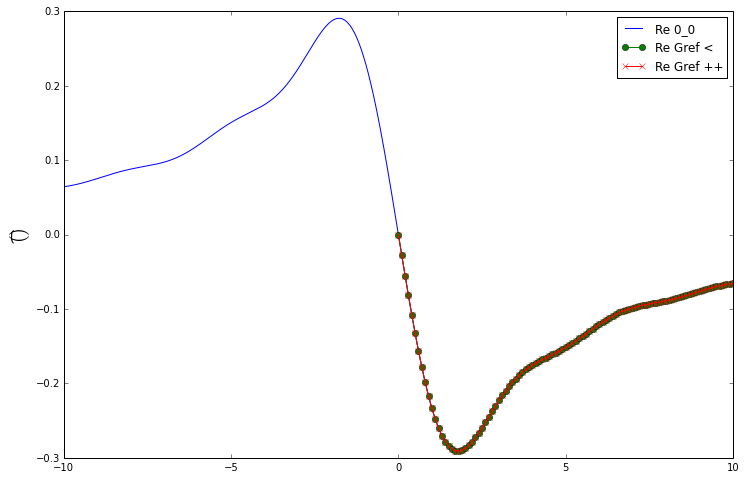

In [14]:
oplot(g0_lesser[0,0].real)
plt.plot(g[:,0], g[:,1], '-o', label = 'Re Gref <')
plt.plot(g[:,0], (g[:,1] + g[:,3]), '-x', label = 'Re Gref ++')
plt.legend()
plt.xlim(-10,10)